In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
#设置显示风格
plt.style.use('fivethirtyeight')
#读数据
train_data =pd.read_csv('E:/data/train.txt', sep='\t',names=['sentence','label'])


In [9]:
train_data

,sentence,label
0,中华女子学院：本科层次仅1专业招男生,3
1,两天价网站背后重重迷雾：做个网站究竟要多少钱,4
2,东5环海棠公社230-290平2居准现房98折优惠,1
3,卡佩罗：告诉你德国脚生猛的原因 不希望英德战踢点球,7
4,82岁老太为学生做饭扫地44年获授港大荣誉院士,5
...,...,...
179995,侧滑掌上PSP手机 索爱Xperia Play评测,4
179996,皖通高速跌0.8% 国元香港给予买入评级,2
179997,《无限江湖》近日更新,8
179998,廊坊十九城邦别墅现内部认购96折均价7000(图),1


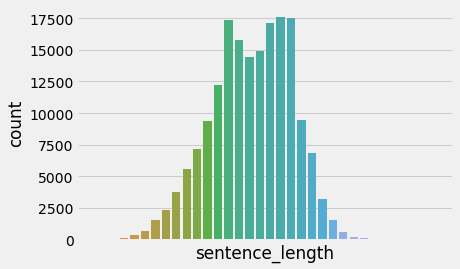

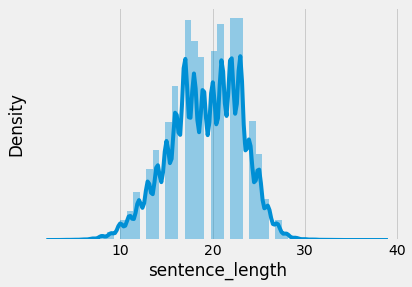

In [20]:
import warnings
warnings.filterwarnings('ignore')

#在训练数据中添加新的句子长度列,每个元素的值都是对应的句子列的长度
train_data['sentence_length'] = list(map(lambda x: len(x),train_data['sentence']))
                                     
#绘制句子长度列的数量分布图
sns.countplot('sentence_length',data=train_data)   
                                     
#主要关注 count长度分布的纵坐标,不需要绘制横坐标,横坐标范围通过dist图进行查看
plt.xticks([])
plt.show()
                                     
#绘制dist长度分布图
sns.distplot(train_data['sentence_length'])
                                     
#主要关注dist长度分布横坐标,不需要绘制纵坐标
plt.yticks([])
plt.show()

可以发现，文本成正态分布。通常采用分位值对数据进行补全/截断。例如采用超过95%文本长度的sent_len作为模型的最大输入长度。这种方法可以有效避免极少数超长数据对整个模型的影响,获取超过95%文本长度的sent_len的代码如下

In [22]:
sent_len = sorted(train_data['sentence_length'])[int(len(train_data)*0.95)]
